In [6]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
wine = datasets.load_wine()

In [8]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
X = wine.data
y = wine.target

In [11]:
X.shape, y.shape

((178, 13), (178,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

## Generating Model for K=3

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6851851851851852


## Generating Model for K=5

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


## Generating Model for K=7

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7407407407407407


In [18]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### standardization in sklearn

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9629629629629629


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [26]:
cv_scores

[0.9439735982112143,
 0.954499914000688,
 0.9666322669418644,
 0.9663398692810456,
 0.97218782249742,
 0.9718954248366012,
 0.9666322669418644,
 0.9666322669418644,
 0.9725146198830409,
 0.9725146198830409,
 0.9725146198830409,
 0.9833333333333334,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9660130718954247,
 0.9718954248366012,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9610767113863089,
 0.9610767113863089,
 0.9551943584451325,
 0.9551943584451325,
 0.9551943584451325]

In [27]:
MSE = [1 - x for x in cv_scores]
MSE

[0.05602640178878571,
 0.04550008599931199,
 0.03336773305813556,
 0.03366013071895435,
 0.027812177502580027,
 0.028104575163398815,
 0.03336773305813556,
 0.03336773305813556,
 0.027485380116959113,
 0.027485380116959113,
 0.027485380116959113,
 0.016666666666666607,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.033986928104575265,
 0.028104575163398815,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.0389232886136911,
 0.0389232886136911,
 0.04480564155486755,
 0.04480564155486755,
 0.04480564155486755]

In [28]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is: ', optimal_k)

The optimal number of k is:  23


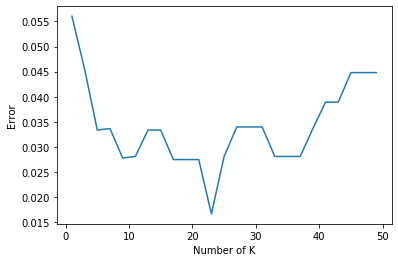

In [29]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)


knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9814814814814815
